                                             |          | [  0%]   00:00 -> (? left)

Report EDA_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



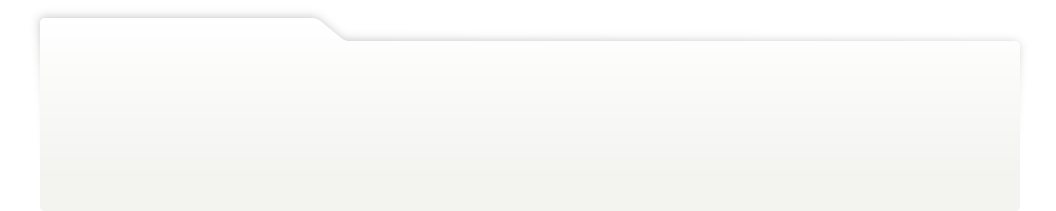
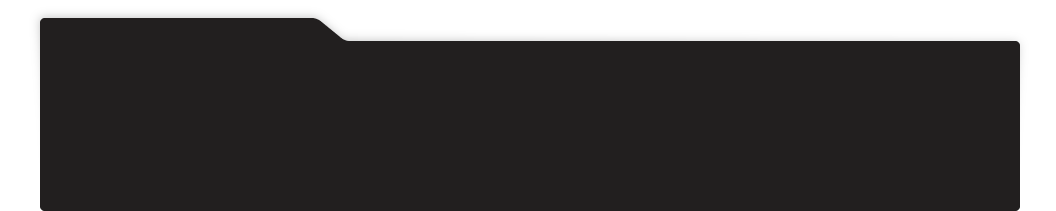
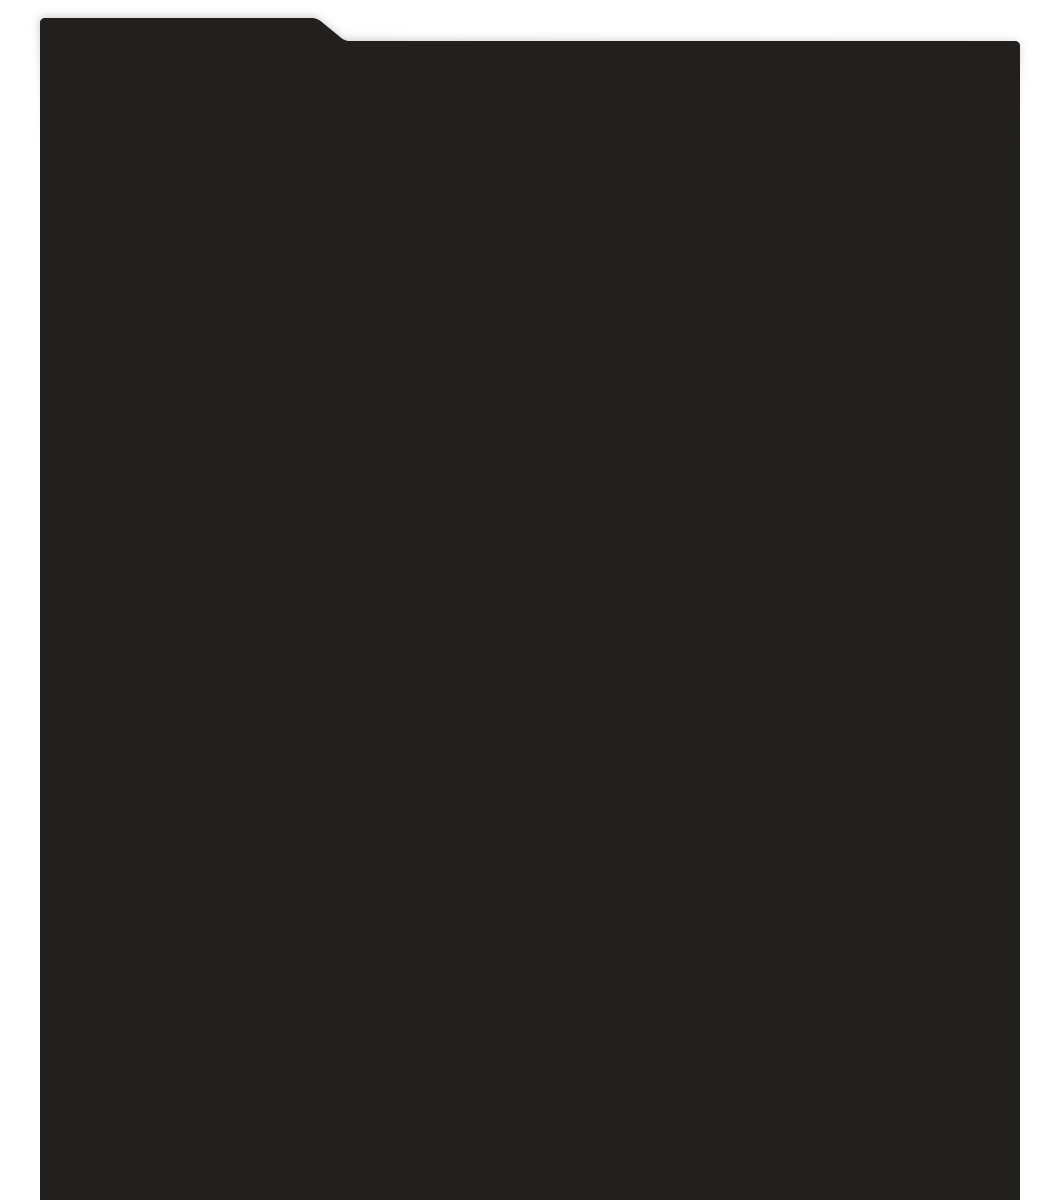
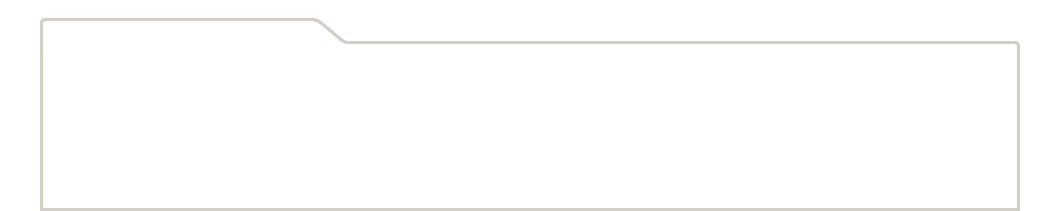
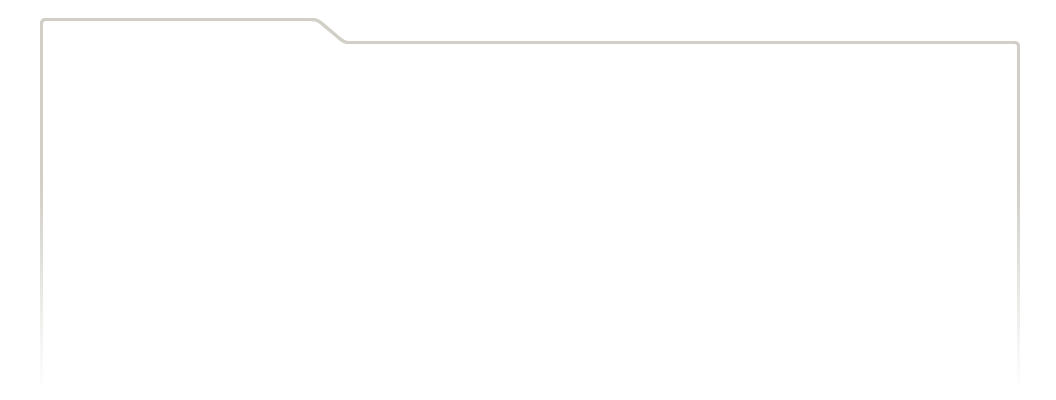
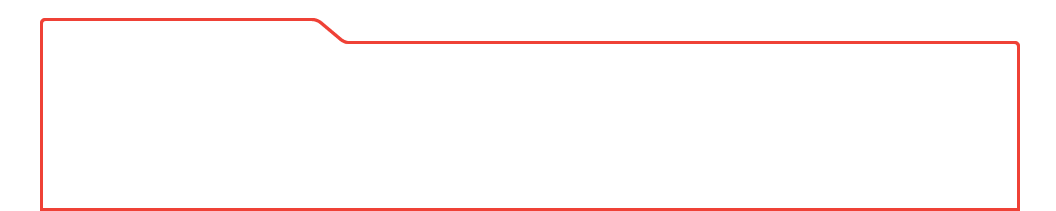
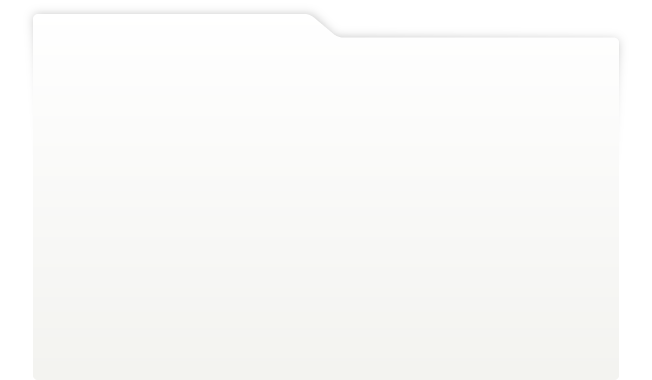
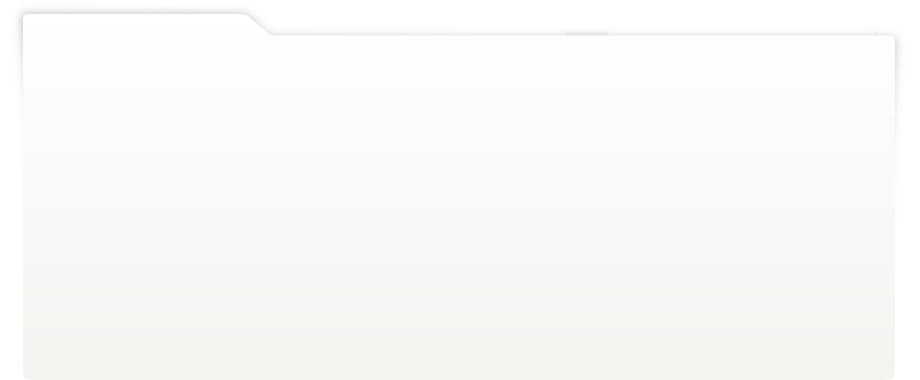
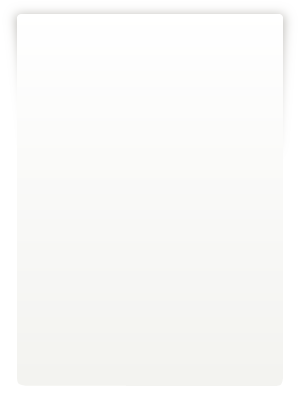
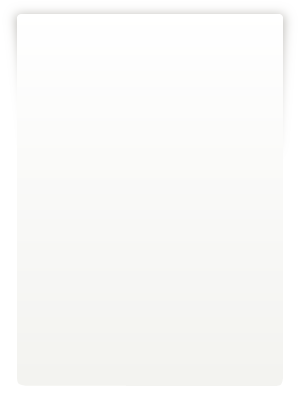
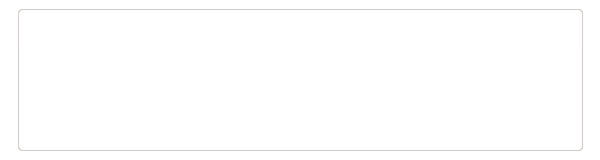
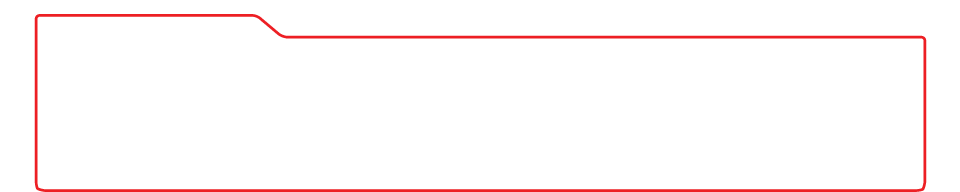
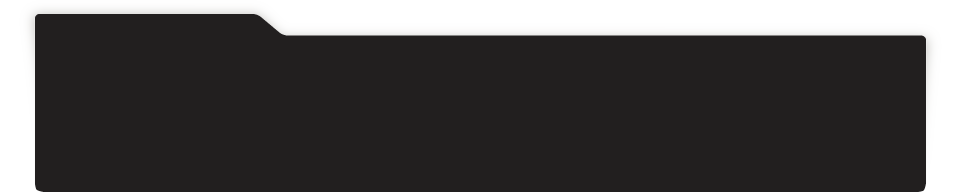
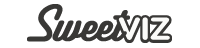
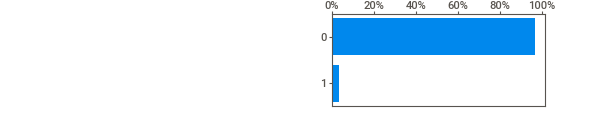
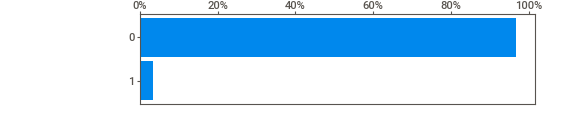
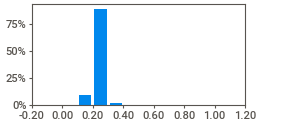
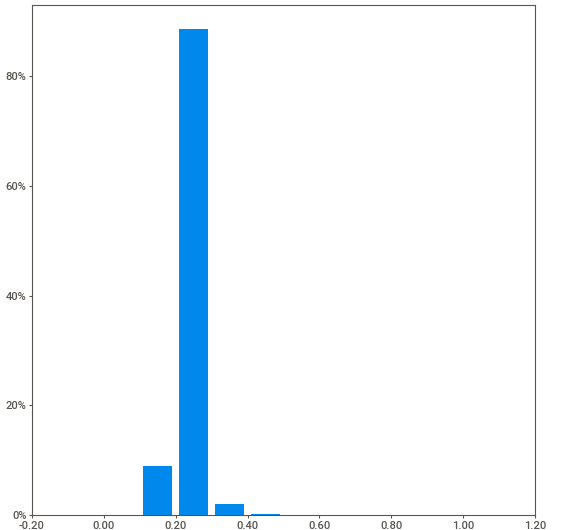
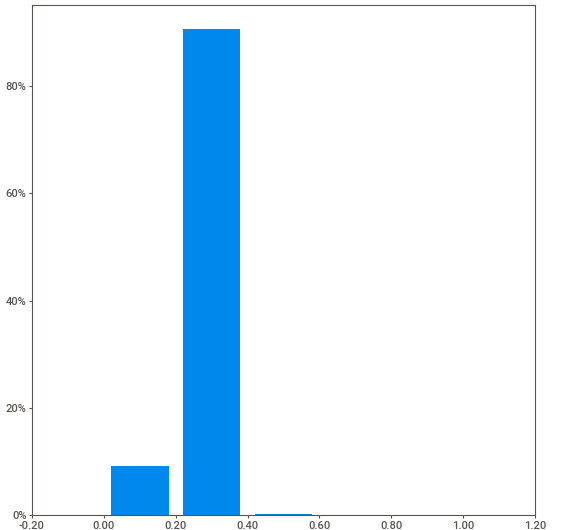
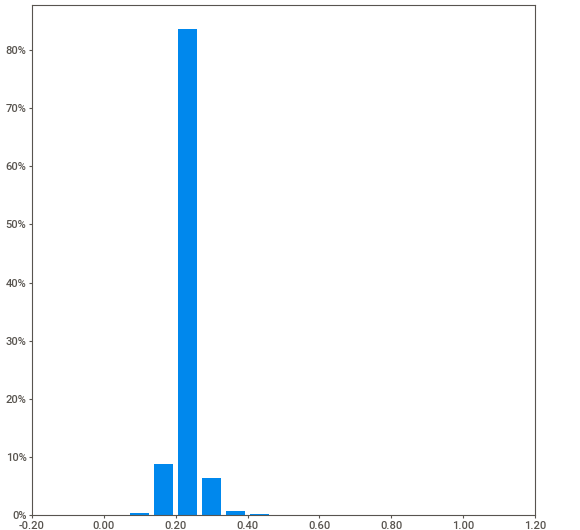
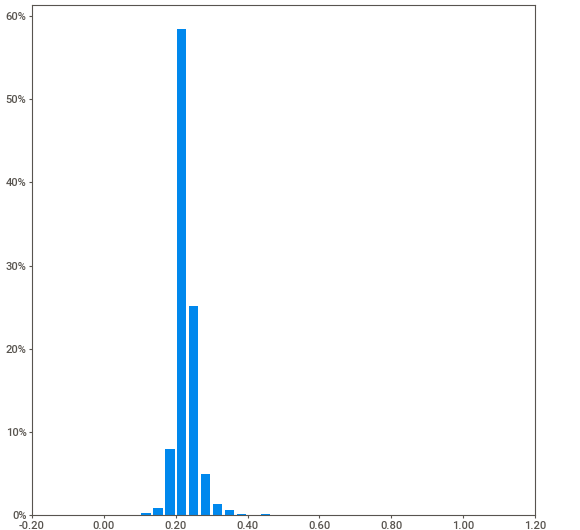
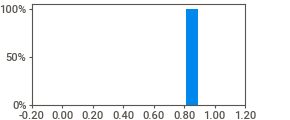
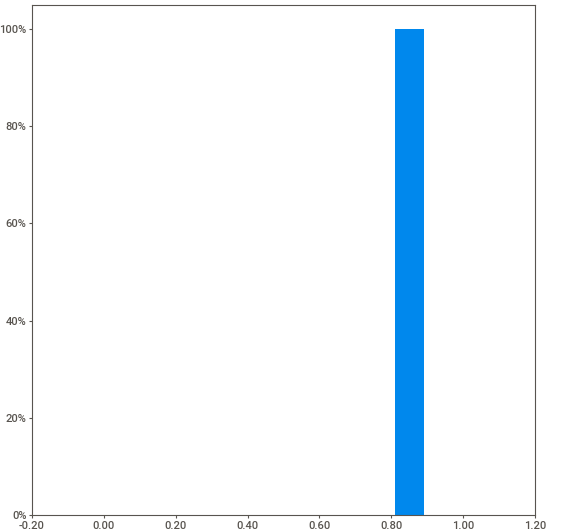
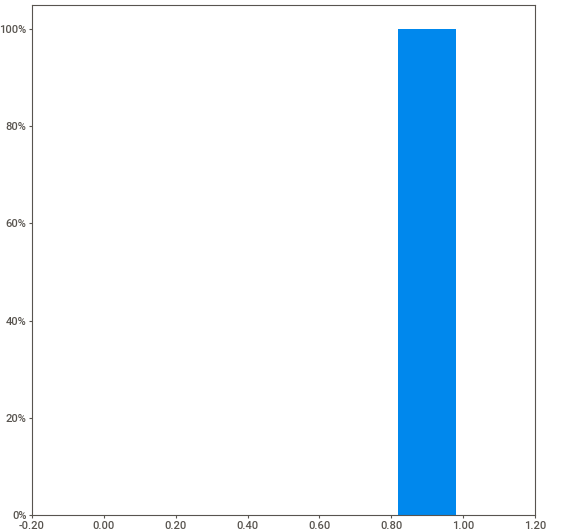
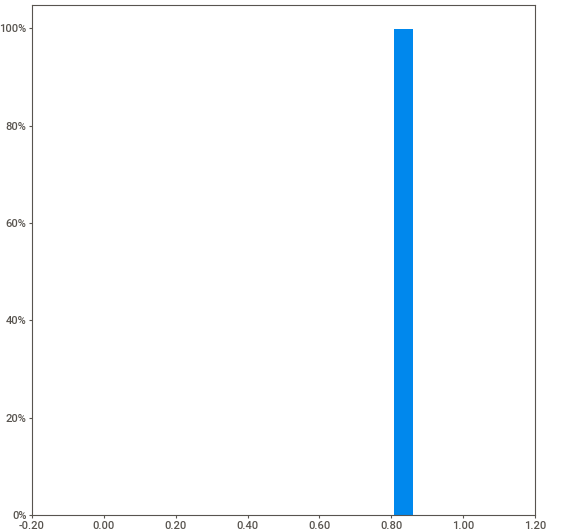
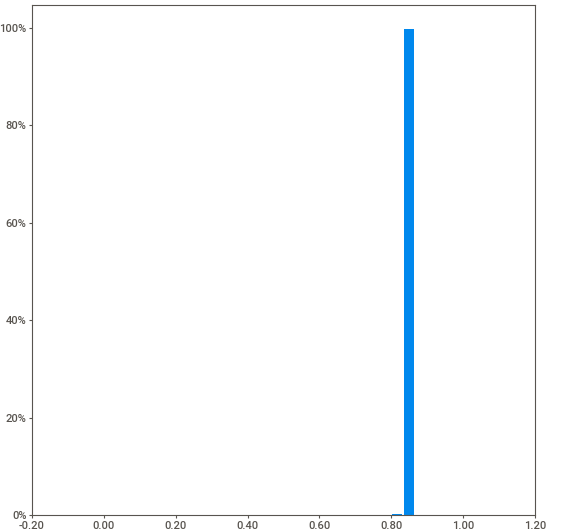
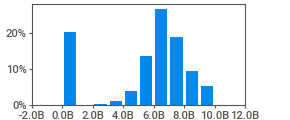
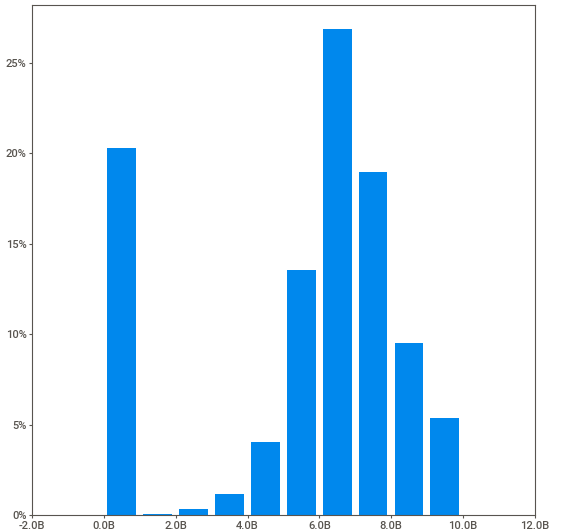
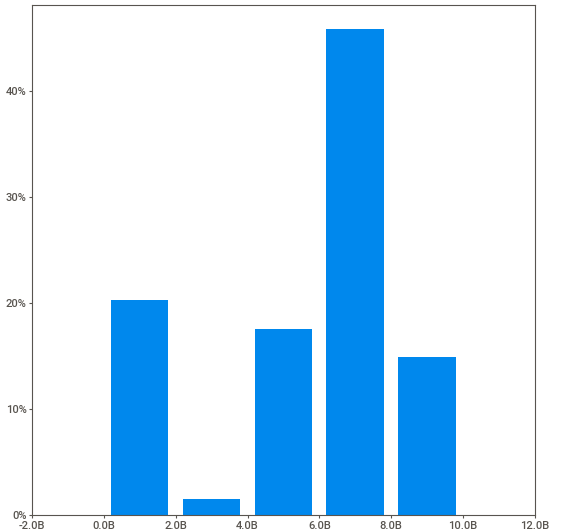
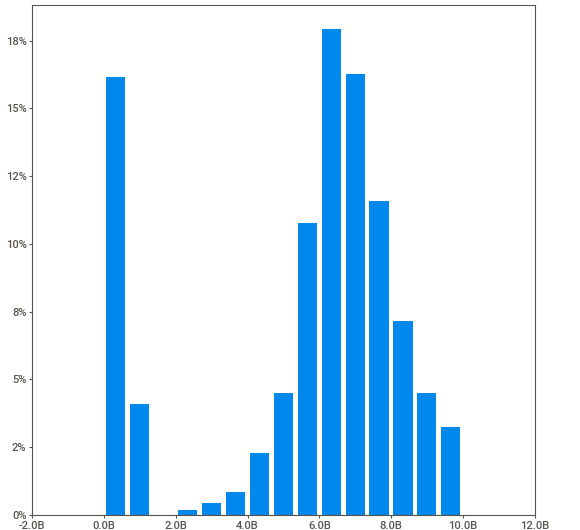
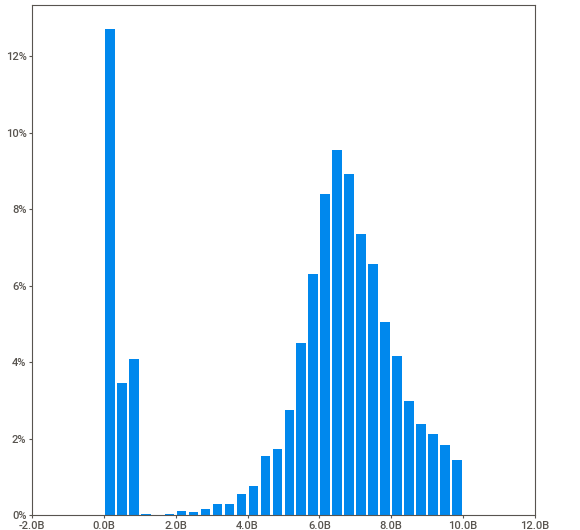
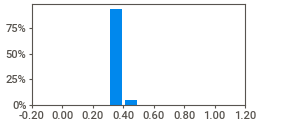
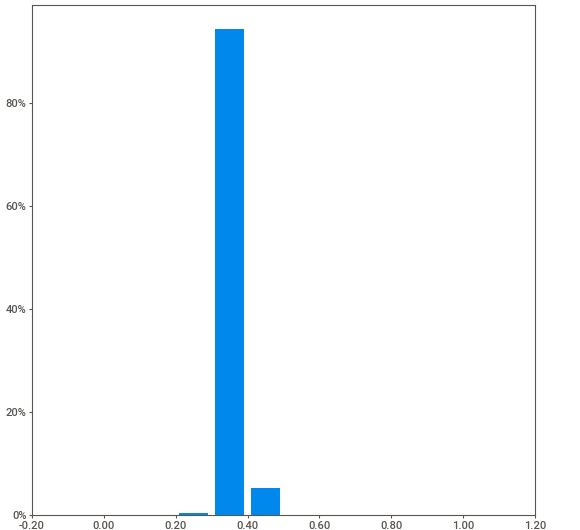
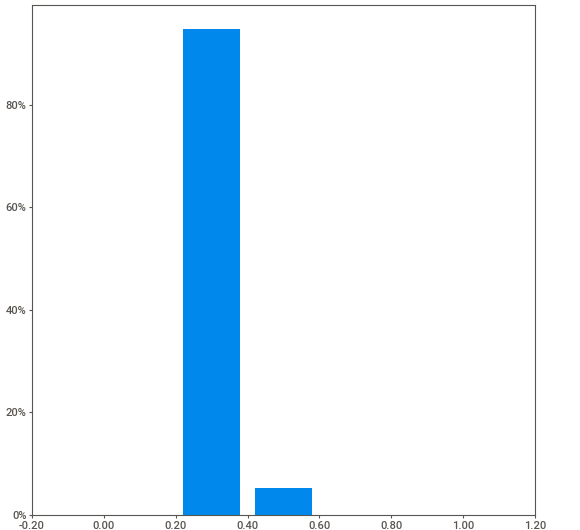
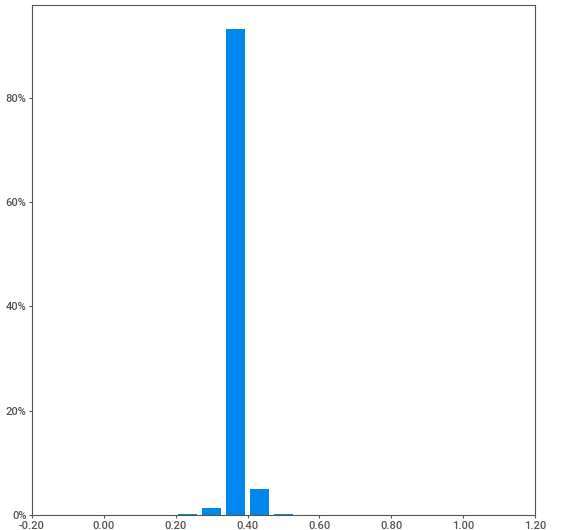
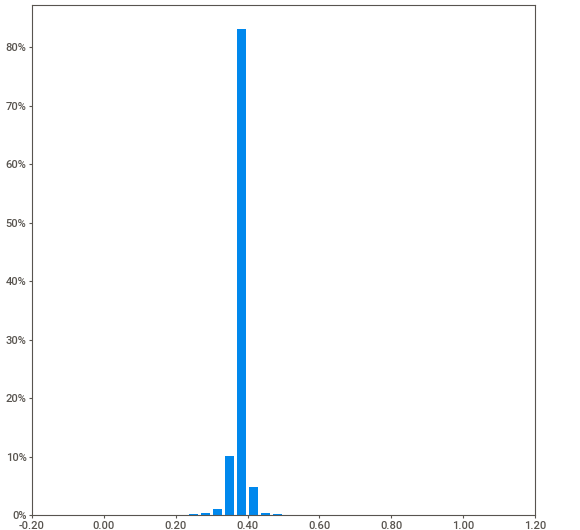
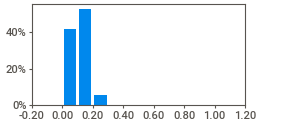
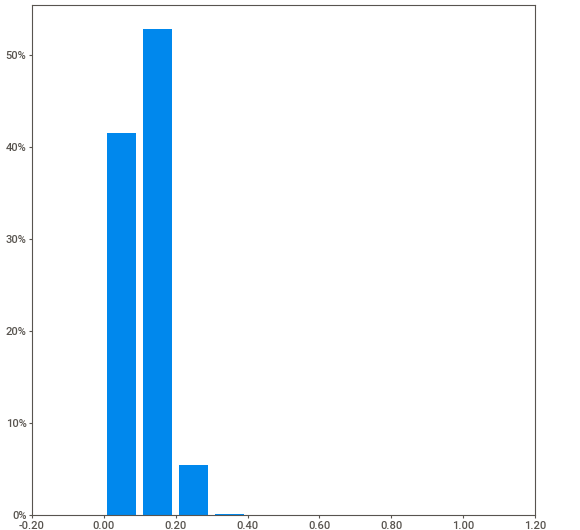
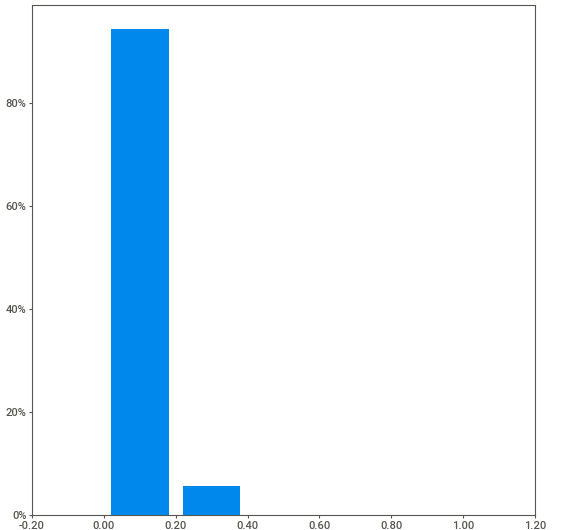
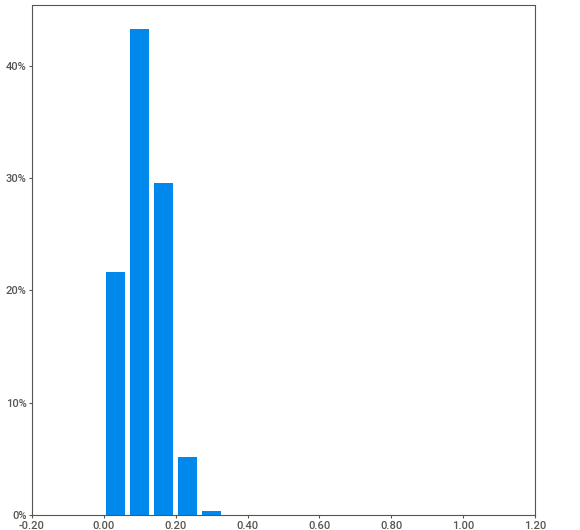
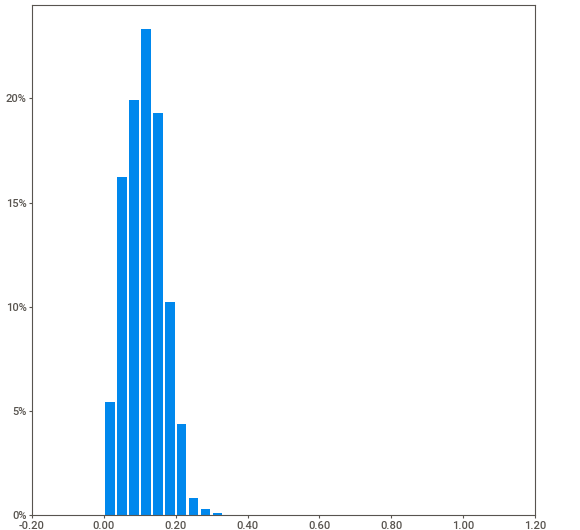
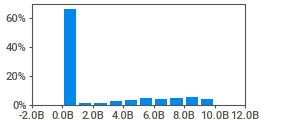
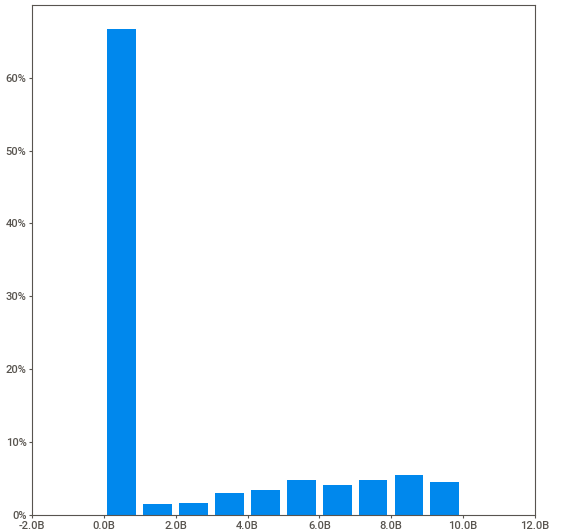
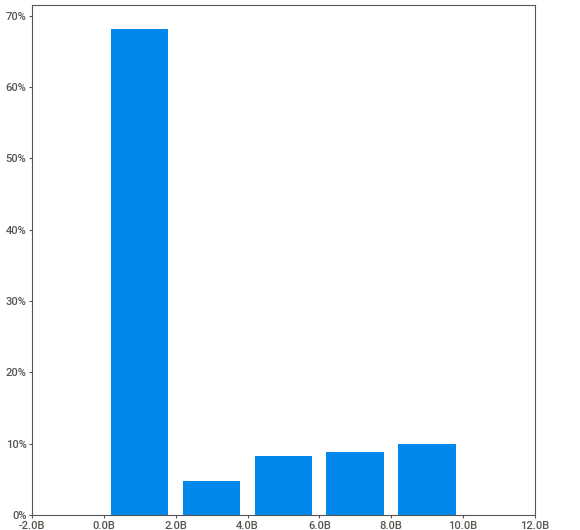
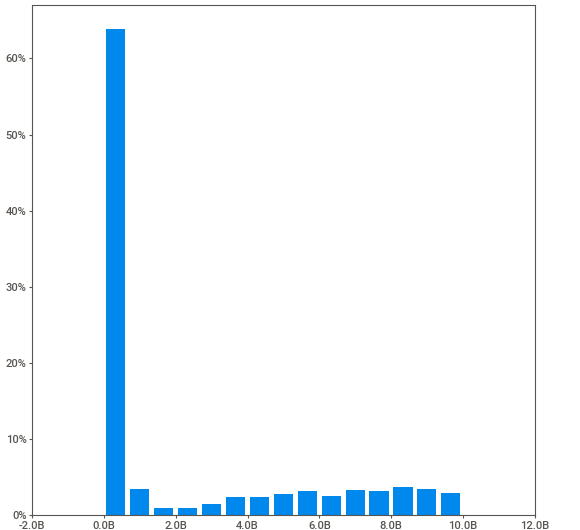
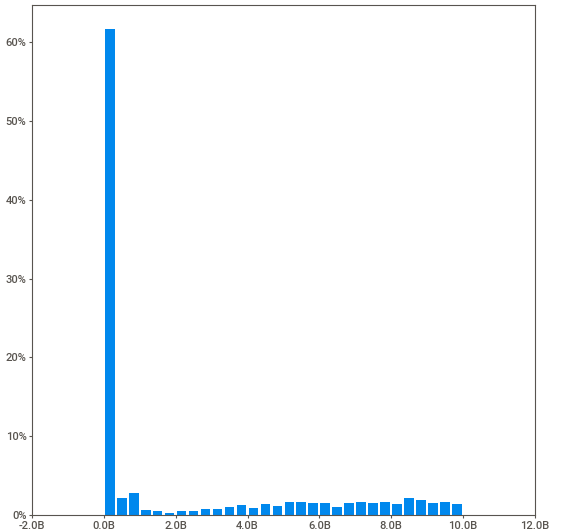
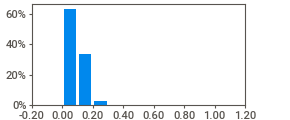
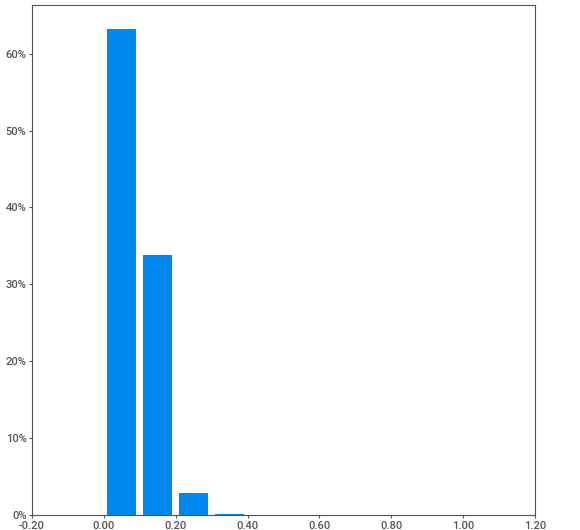
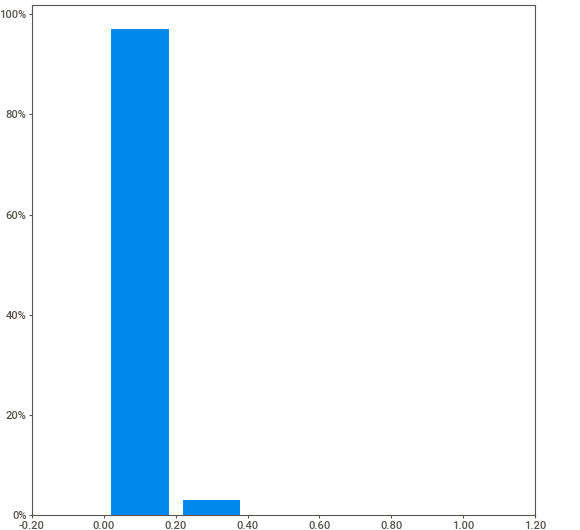
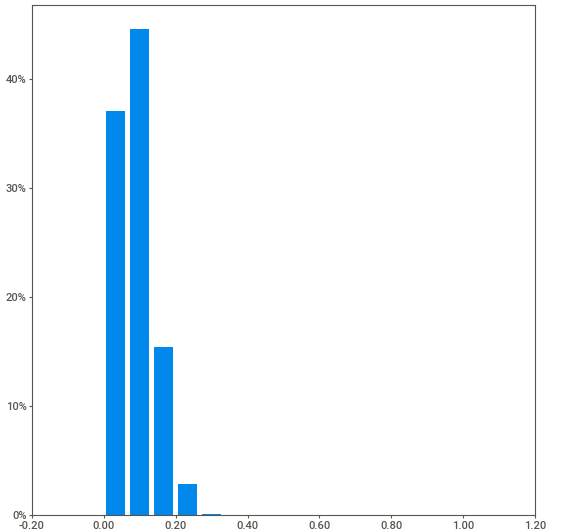
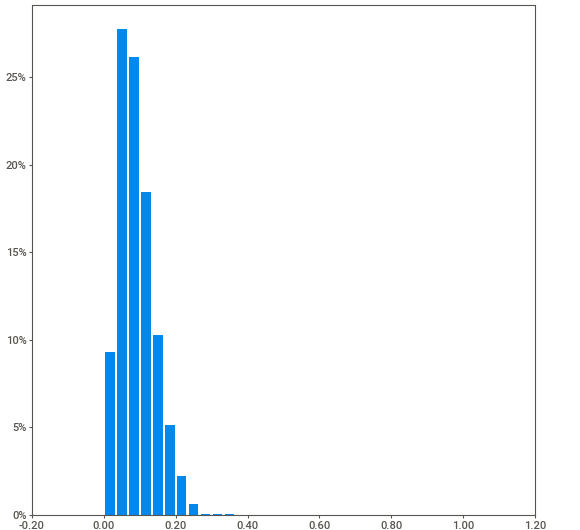
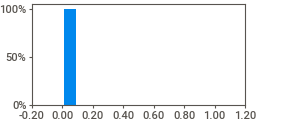
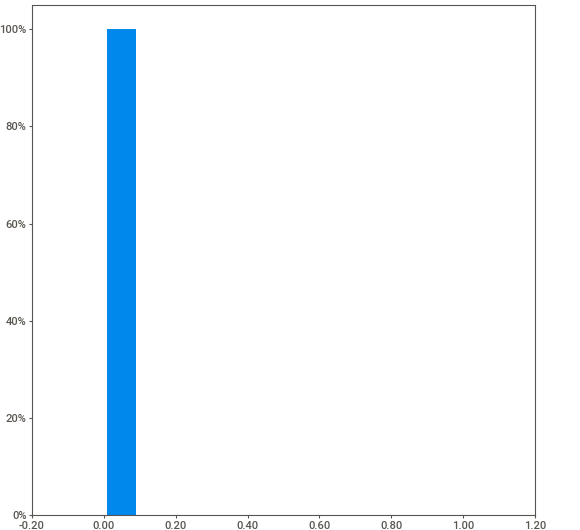
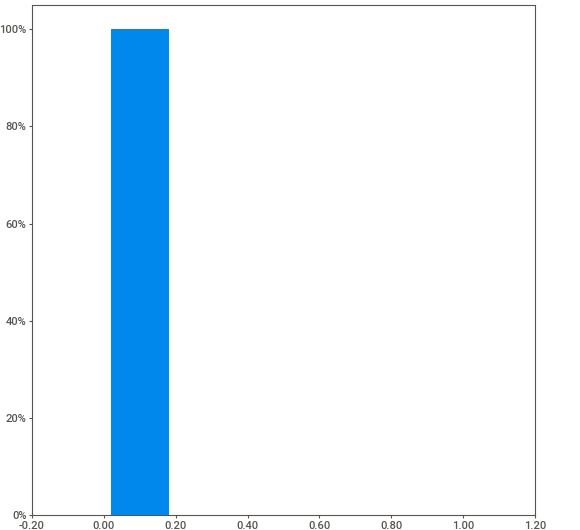
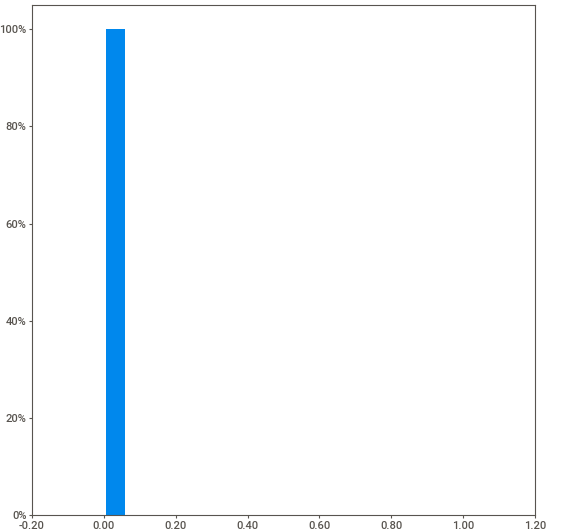
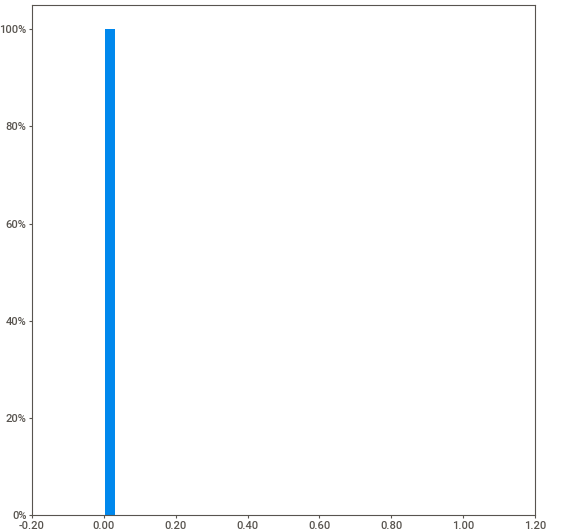
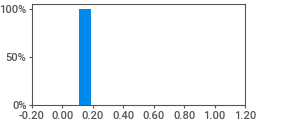
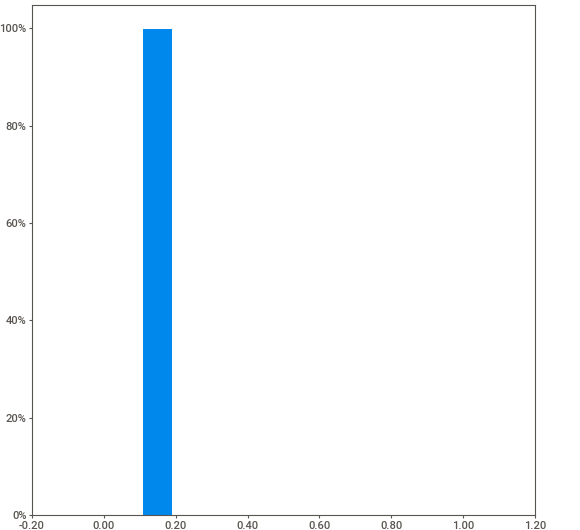
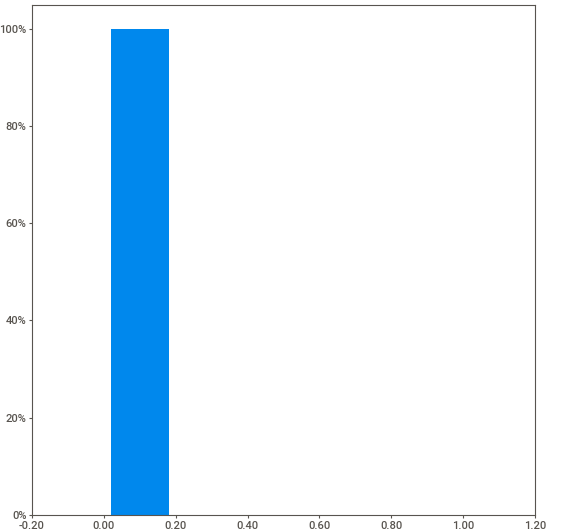
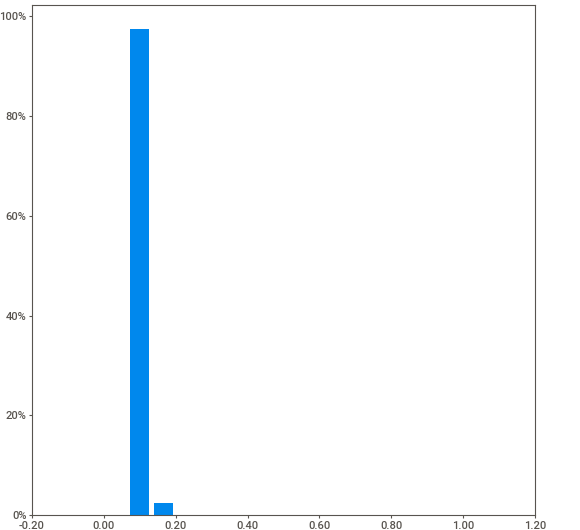
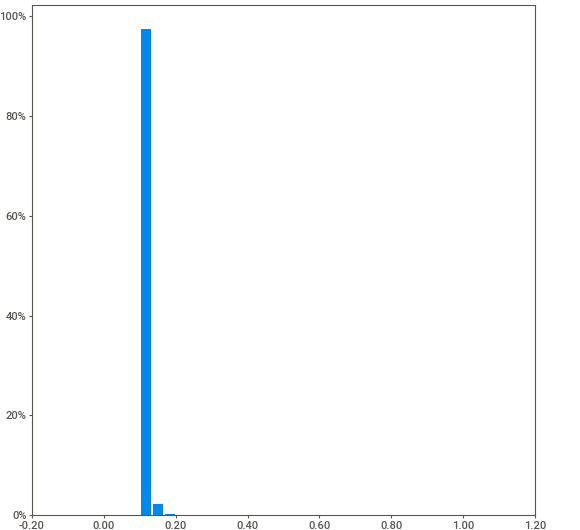
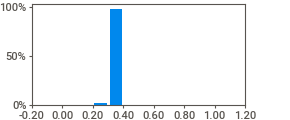
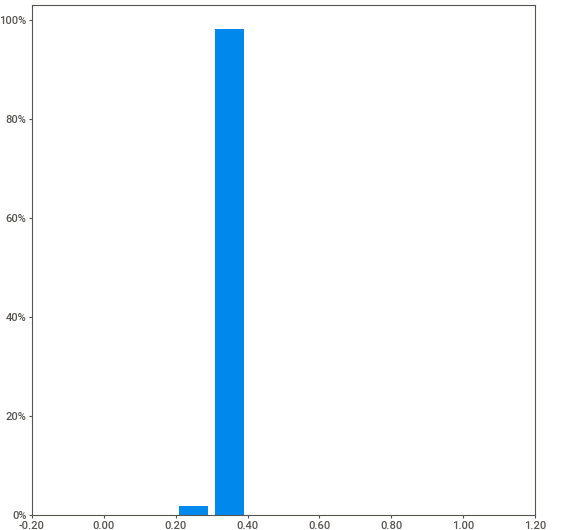
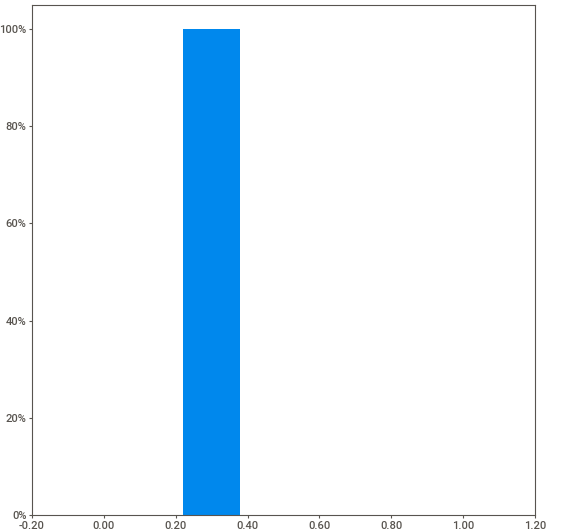
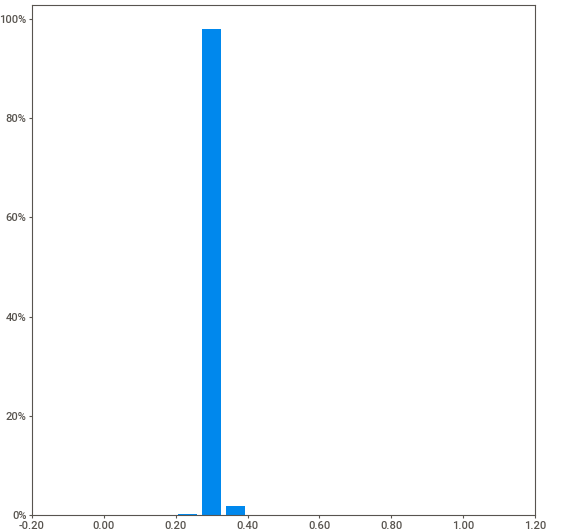
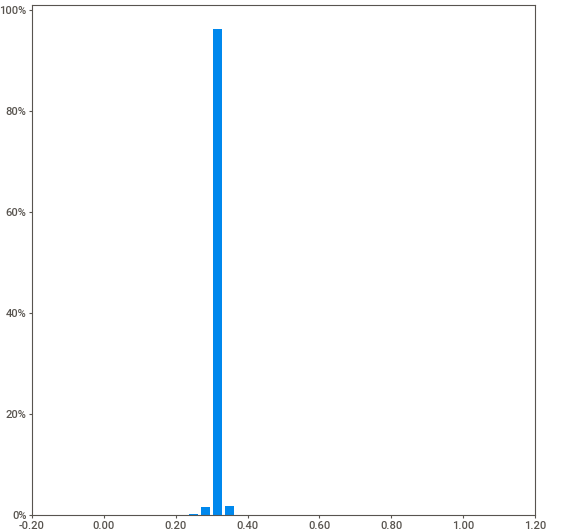
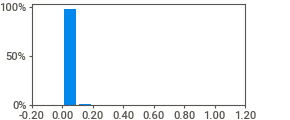
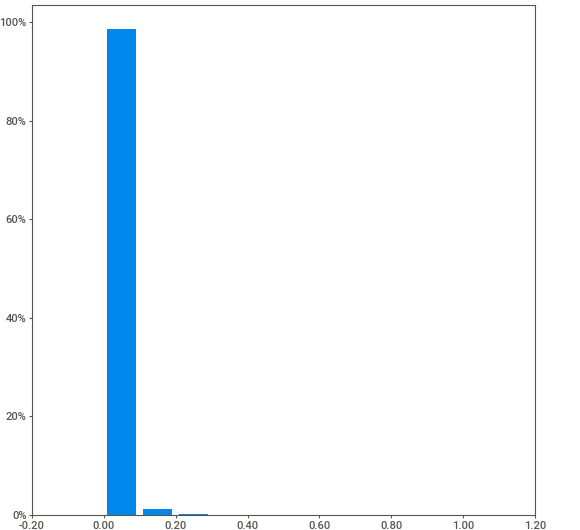
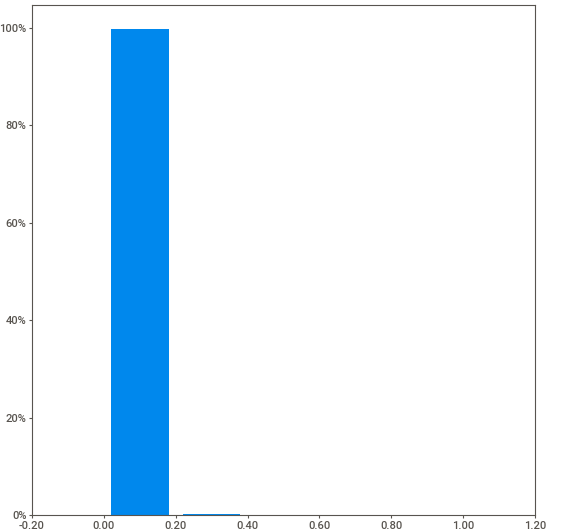
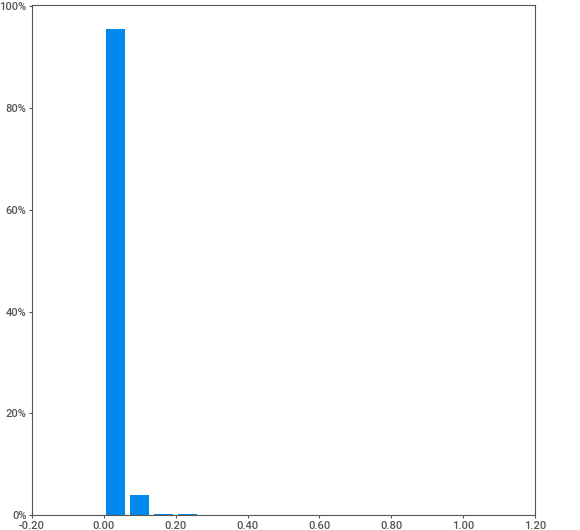
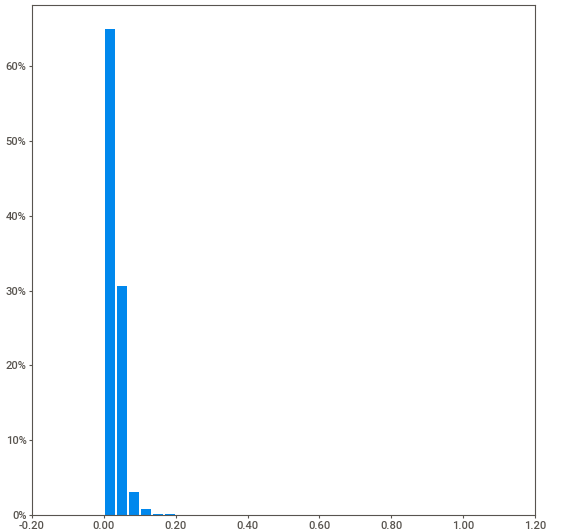
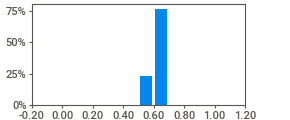
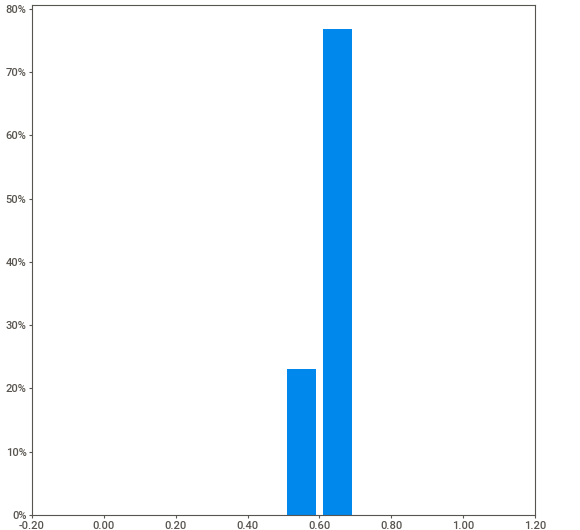
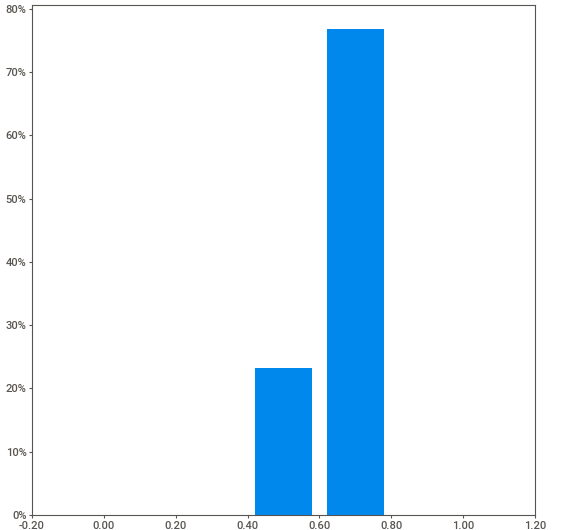
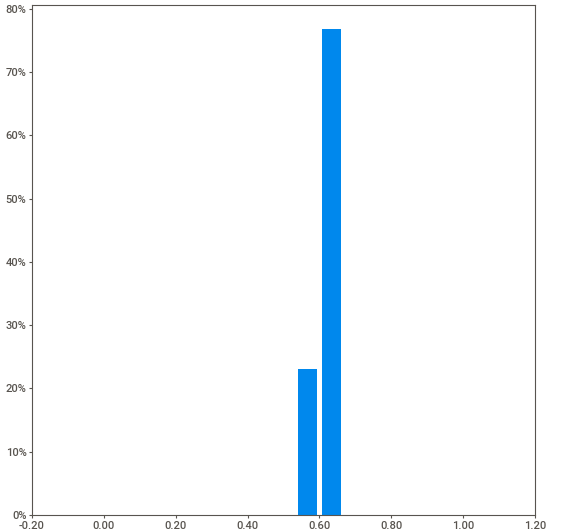
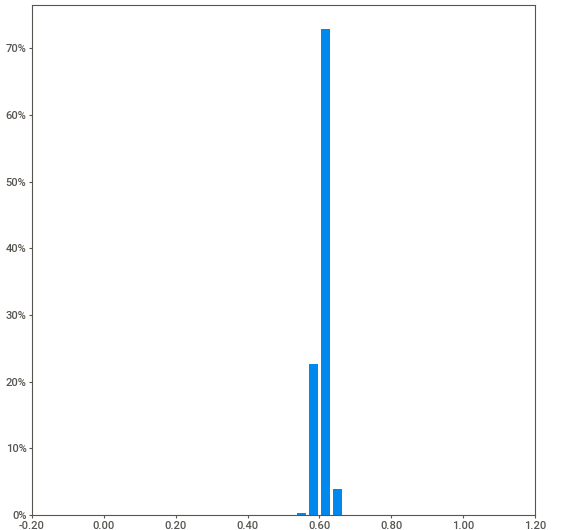
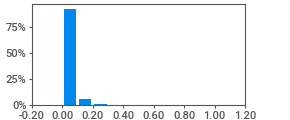
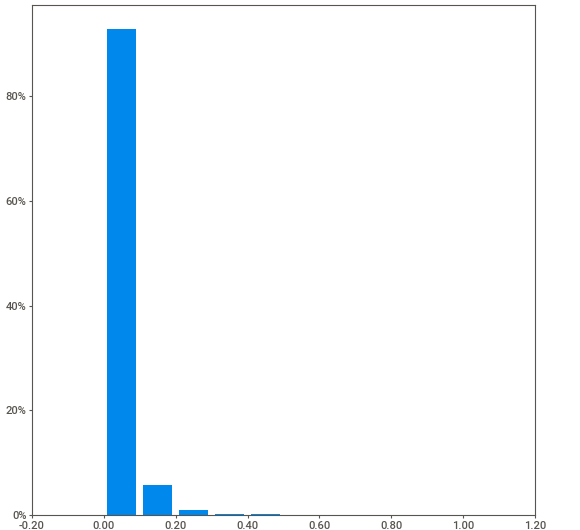
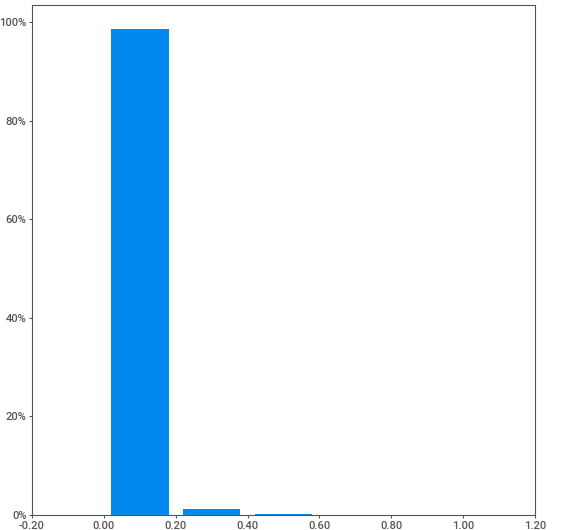
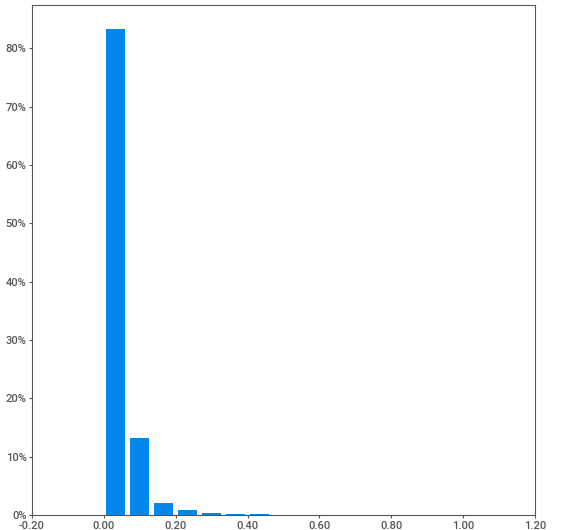
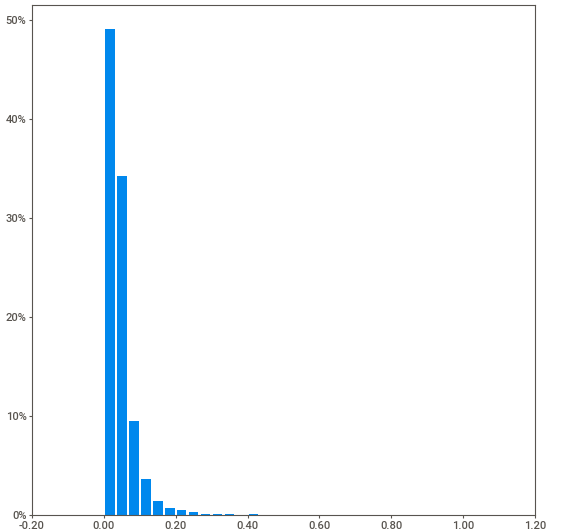
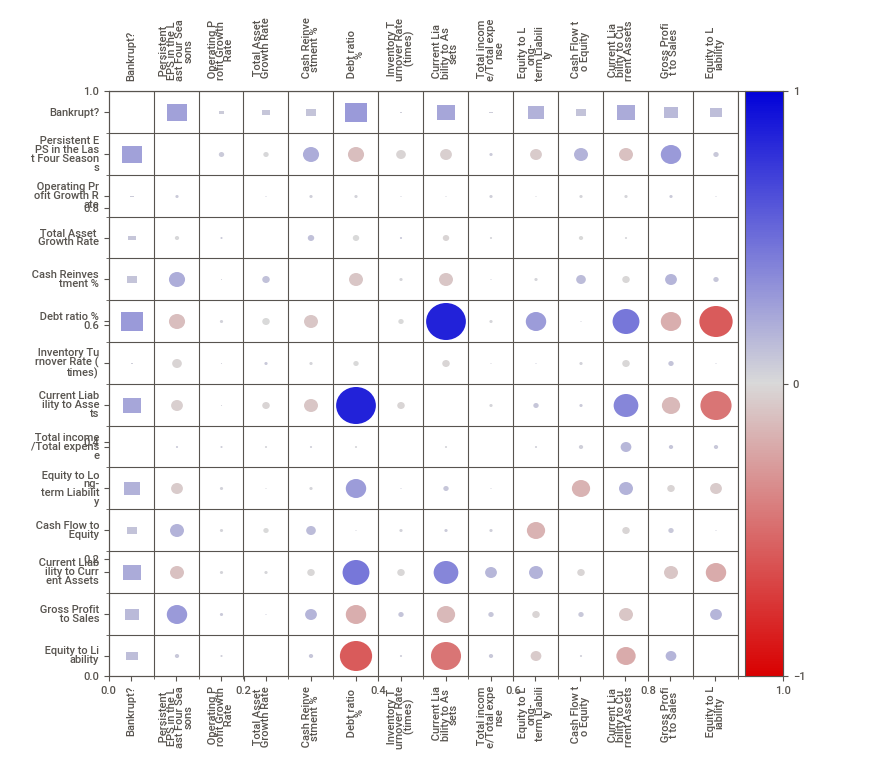
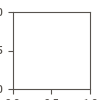

In [1]:
import sweetviz as sv
import pandas as pd

# Load your dataset 
file_path = 'C:\Programming\PROJECTS\Company Bancrupty Prediction\data.csv'
data = pd.read_csv(file_path)


report = sv.analyze(data)


report.show_html('EDA_REPORT.html')


report.show_notebook()


In [2]:
data.dtypes

Bankrupt?                                     int64
 Persistent EPS in the Last Four Seasons    float64
 Operating Profit Growth Rate               float64
 Total Asset Growth Rate                    float64
 Cash Reinvestment %                        float64
 Debt ratio %                               float64
 Inventory Turnover Rate (times)            float64
 Current Liability to Assets                float64
 Total income/Total expense                 float64
 Equity to Long-term Liability              float64
 Cash Flow to Equity                        float64
 Current Liability to Current Assets        float64
 Gross Profit to Sales                      float64
 Equity to Liability                        float64
dtype: object

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.97

Confusion Matrix:
[[1309    4]
 [  41   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.71      0.20      0.31        51

    accuracy                           0.97      1364
   macro avg       0.84      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [4]:
import joblib

joblib.dump(model, 'bankruptcy_prediction_model.joblib')

print("Model saved successfully.")


Model saved successfully.
